 # <center>ADS Project </center>

## Problem Description

Predicting the price of a stock is a commun field for ml. Our problem setting is to predict the Ethereum Price for the next day, week and month based on its network data is an interesting problem. For that we want to use different Forcasting Methods an want to evaluate them. Also we want to know which of the features are the most relevant ones.

**Problem Statement**:
Predicting the price of a stock is a commun field for ml. 
Our problem setting is to predict the Ethereum Price for the next day, week and month based on its network data is an interesting problem. 
For that we want to use different Forcasting Methods an want to evaluate them. Also we want to know which of the features are the most relevant ones. 

**Target Variable**: Ethereum Price

**Models**:
- Autoregressive Integrated Moving Average (ARIMA)
- LSTM
- Holt Winter’s Exponential Smoothing (HWES) 
- FB Prophet

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
%matplotlib inline


import warnings
warnings.filterwarnings("ignore")

In [2]:
df_ads = pd.read_csv('cleaned_data.csv',index_col='Date')

In [3]:
df_ads.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1500 entries, 2015-07-30 to 2019-09-06
Data columns (total 5 columns):
Supply          1500 non-null float64
AddressCount    1500 non-null float64
Uncles          1500 non-null float64
BtcPrice        1500 non-null float64
Price           1500 non-null float64
dtypes: float64(5)
memory usage: 70.3+ KB


In [4]:
df_ads.head()

Supply  AddressCount    Uncles  BtcPrice  Price
Date                                                         
2015-07-30  0.000000      0.000000  0.595431  0.003951    0.0
2015-07-31  0.001017      0.000002  0.195431  0.003779    0.0
2015-08-01  0.001796      0.000004  0.105584  0.003611    0.0
2015-08-02  0.002589      0.000005  0.136041  0.003658    0.0
2015-08-03  0.003375      0.000006  0.160914  0.003669    0.0

In [5]:
import plotly.offline as py
import plotly.graph_objs as go
import plotly.figure_factory as ff
py.init_notebook_mode(connected=True)

In [6]:
# Chart the pricing data
ether_trace = go.Scatter(x=df_ads.index, y=df_ads['Price'])
py.iplot([ether_trace])

# FB Prophet

In [7]:
# fbprophet

from fbprophet import Prophet

df_prophet1 = df_ads
df_prophet1['Date'] = df_ads.index

df_prophet2 = df_ads.rename(columns={"Date": "ds"})
df_prophet = df_prophet2.rename(columns={"Price": "y"})

my_model = Prophet(daily_seasonality=True)
my_model.fit(df_prophet)

In [8]:
future_dates = my_model.make_future_dataframe(periods=365)
future_dates.tail()

ds
1860 2020-09-01
1861 2020-09-02
1862 2020-09-03
1863 2020-09-04
1864 2020-09-05

In [9]:
forecast = my_model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds        yhat  yhat_lower  yhat_upper
1860 2020-09-01  287.444580 -336.971396  894.476093
1861 2020-09-02  285.159402 -334.513370  892.296827
1862 2020-09-03  282.523256 -355.433912  879.112793
1863 2020-09-04  282.586056 -361.367972  871.432182
1864 2020-09-05  284.015153 -348.361781  882.665850

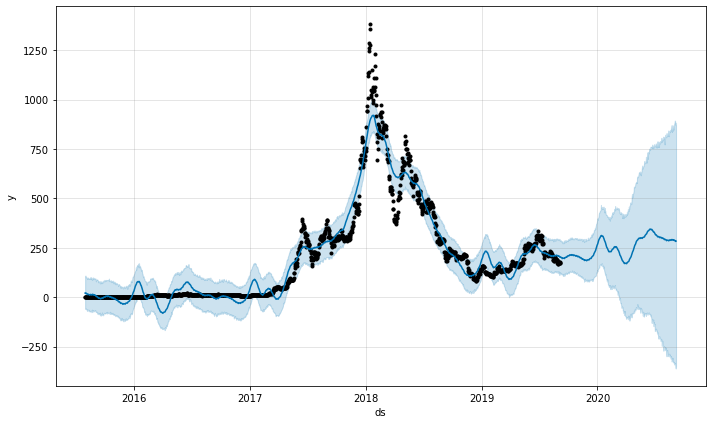

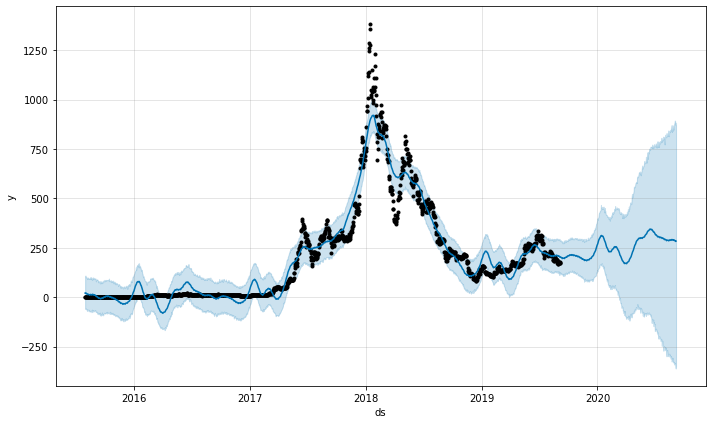

In [10]:
my_model.plot(forecast,uncertainty=True)

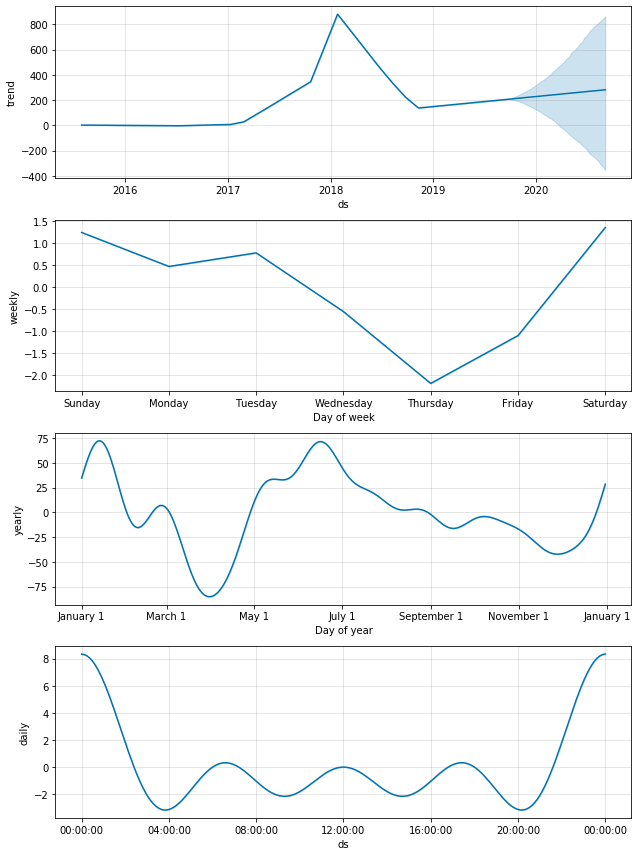

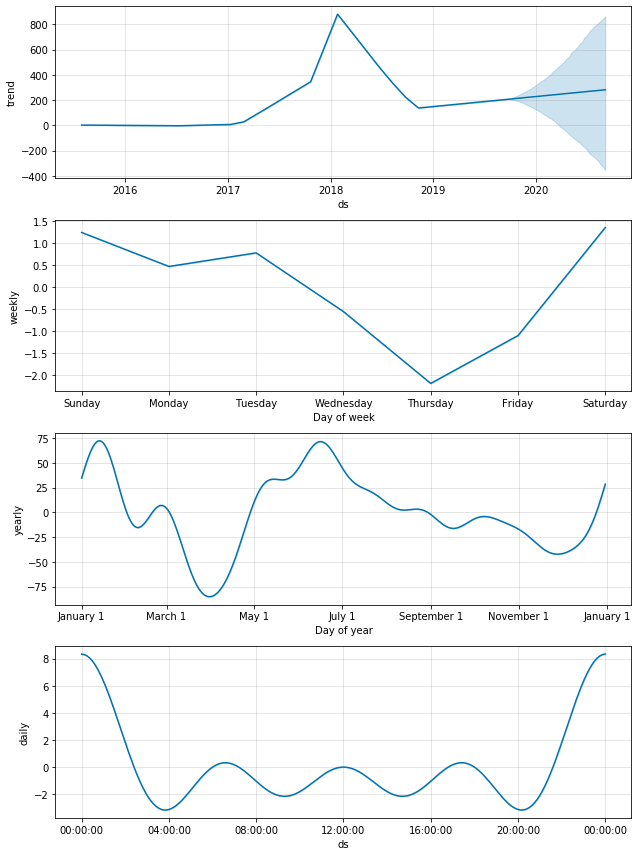

In [11]:
my_model.plot_components(forecast)

In [12]:
forecast.tail(366)

ds       trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
1499 2019-09-06  202.645604  119.261702  284.486124   202.645604   202.645604   
1500 2019-09-07  202.863032  120.652719  283.620801   202.863032   202.863032   
1501 2019-09-08  203.080461  123.812428  288.147021   203.080461   203.080461   
1502 2019-09-09  203.297890  115.371883  282.383543   203.297890   203.297890   
1503 2019-09-10  203.515318  116.231596  281.708677   203.515318   203.515318   
1504 2019-09-11  203.732747  118.986068  278.870854   203.732747   203.732747   
1505 2019-09-12  203.950176  114.758201  283.080413   203.950176   203.950176   
1506 2019-09-13  204.167604  118.271330  272.786126   204.167604   204.167604   
1507 2019-09-14  204.385033  108.213752  275.259777   204.385033   204.385033   
1508 2019-09-15  204.602461  112.675977  279.071501   204.602461   204.602461   
1509 2019-09-16  204.819890  108.111428  272.962092   204.819890   204.819890   
1510 2019-09-17  205.037319  118.299107  287.409777   205.037319   205.037319   
1511 2019-09-18  205.254747  119.114765  283.989034   205.254747   205.254747   
1512 2019-09-19  205.472176  108.390240  278.345084   205.472176   205.507615   
1513 2019-09-20  205.689604  114.484279  277.536852   205.667600   205.982803   
1514 2019-09-21  205.907033  116.957076  284.369006   205.755064   206.494638   
1515 2019-09-22  206.124462  121.909857  289.526921   205.712748   207.044100   
1516 2019-09-23  206.341890  124.094583  279.731727   205.743605   207.630812   
1517 2019-09-24  206.559319  118.797408  284.756618   205.788180   208.014664   
1518 2019-09-25  206.776747  124.245033  287.302194   205.672091   208.415509   
1519 2019-09-26  206.994176  116.959424  287.760918   205.666383   208.984639   
1520 2019-09-27  207.211605  119.671010  286.894947   205.315539   209.444983   
1521 2019-09-28  207.429033  121.887876  285.415057   205.114808   210.093824   
1522 2019-09-29  207.646462  120.753106  283.159819   204.898402   210.669976   
1523 2019-09-30  207.863890  122.307959  291.637099   204.672910   211.390748   
1524 2019-10-01  208.081319  129.110830  294.496362   204.341617   211.789231   
1525 2019-10-02  208.298748  126.567415  294.622649   204.201265   212.502851   
1526 2019-10-03  208.516176  120.114888  292.566859   204.017600   213.329865   
1527 2019-10-04  208.733605  124.630847  289.170061   203.875322   213.992002   
1528 2019-10-05  208.951033  131.294477  298.899254   203.581634   215.102850   
...         ...         ...         ...         ...          ...          ...   
1835 2020-08-07  275.701614 -273.165050  821.175481  -274.115892   803.799802   
1836 2020-08-08  275.919043 -267.575381  815.466114  -275.838923   805.844347   
1837 2020-08-09  276.136472 -281.457733  816.118532  -277.699732   807.888892   
1838 2020-08-10  276.353900 -297.373632  822.630095  -282.006294   809.816512   
1839 2020-08-11  276.571329 -298.628054  844.003096  -283.353200   811.603593   
1840 2020-08-12  276.788757 -286.124000  819.482093  -286.287022   813.355918   
1841 2020-08-13  277.006186 -299.489092  814.919251  -288.990985   814.960902   
1842 2020-08-14  277.223615 -287.264414  827.053615  -292.746645   816.212080   
1843 2020-08-15  277.441043 -286.227810  843.475651  -296.502306   818.036679   
1844 2020-08-16  277.658472 -301.518644  835.892516  -300.207543   820.366634   
1845 2020-08-17  277.875900 -294.533304  846.691992  -303.929971   823.400662   
1846 2020-08-18  278.093329 -299.050116  839.021502  -307.738180   825.331764   
1847 2020-08-19  278.310758 -311.788738  843.551310  -309.465055   826.786787   
1848 2020-08-20  278.528186 -297.839236  857.812542  -311.191930   827.762765   
1849 2020-08-21  278.745615 -305.109208  850.102221  -312.918805   829.509785   
1850 2020-08-22  278.963043 -325.935014  871.161752  -314.645679   831.965800   
1851 2020-08-23  279.180472 -320.369908  836.196061  -317.102762   834.279365   
1852 2020-08-24  279.397901 -312.145165  855

In [13]:
from fbprophet.plot import plot_plotly
import plotly.offline as py

py.init_notebook_mode()

fig = plot_plotly(my_model, forecast)
py.iplot(fig)

INFO:fbprophet:Making 5 forecasts with cutoffs between 2016-09-16 00:00:00 and 2018-09-06 00:00:00
INFO:fbprophet:Making 5 forecasts with cutoffs between 2016-09-16 00:00:00 and 2018-09-06 00:00:00
INFO:fbprophet:Making 5 forecasts with cutoffs between 2016-09-16 00:00:00 and 2018-09-06 00:00:00
INFO:fbprophet:Making 5 forecasts with cutoffs between 2016-09-16 00:00:00 and 2018-09-06 00:00:00
INFO:fbprophet:Making 5 forecasts with cutoffs between 2016-09-16 00:00:00 and 2018-09-06 00:00:00


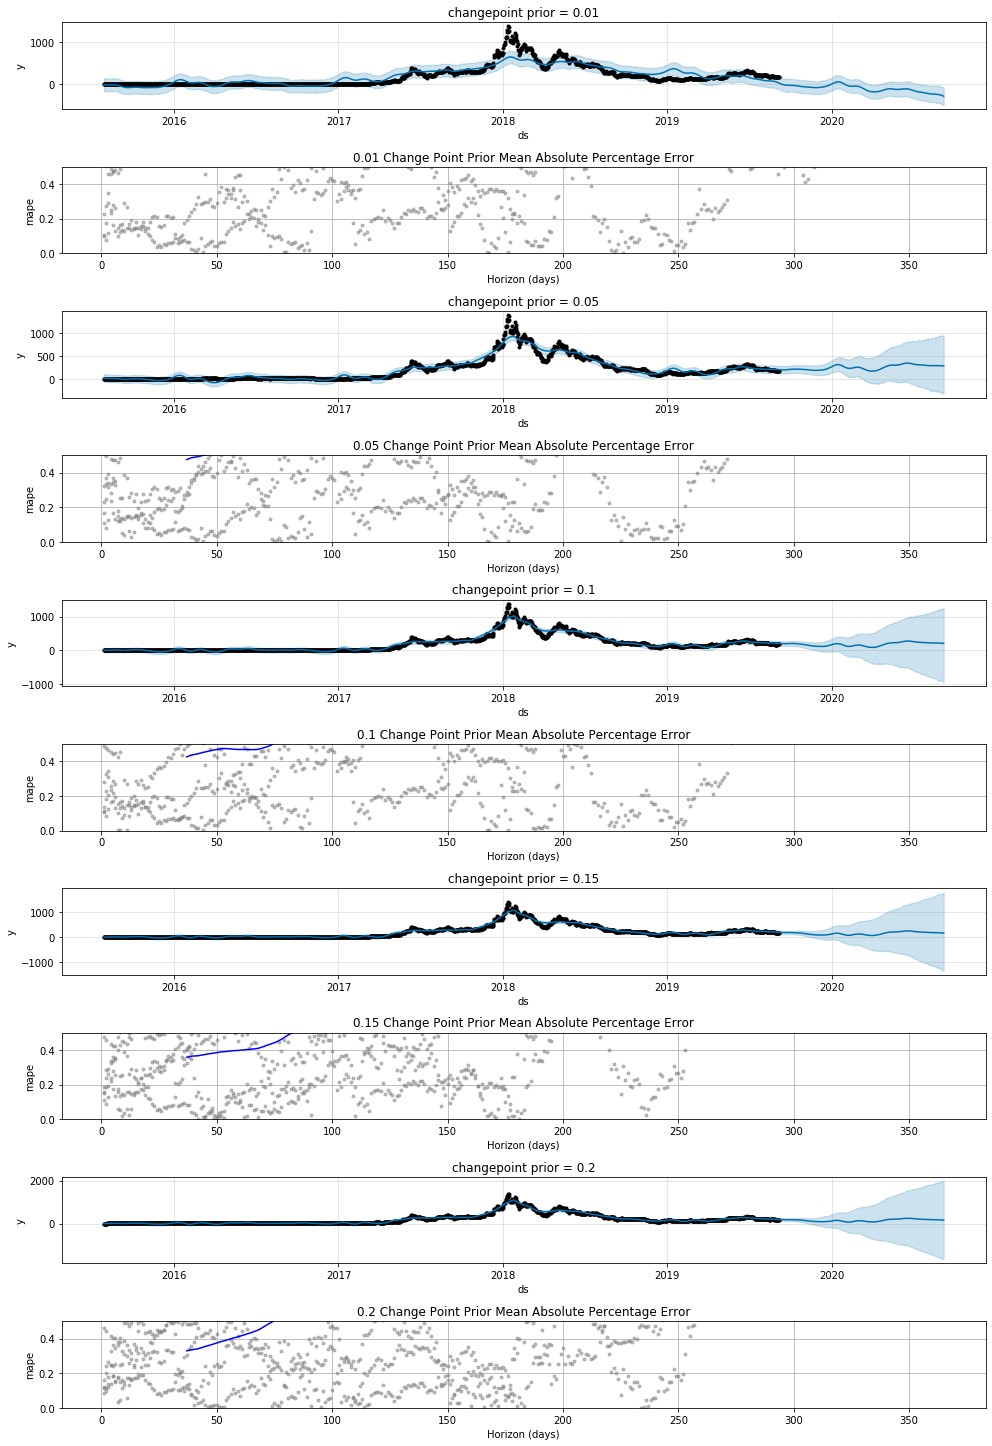

In [14]:
from fbprophet.plot import plot_cross_validation_metric 
from fbprophet.diagnostics import performance_metrics
from fbprophet.diagnostics import cross_validation
pd.plotting.register_matplotlib_converters()

fig, ax = plt.subplots(10,1, figsize = (14, 20))
ax = ax.ravel()
j = 0
for i in [0.01, 0.05, 0.10, 0.15, 0.20]:
    RUT2 = df_ads.rename(columns = {'Date' : 'ds', 'Price' : 'y'} )
    m = Prophet(changepoint_prior_scale=i,daily_seasonality=True)
    #fit the prophet model on the data
    m.fit(RUT2)
    # make a dataframe of the next two years 
    future = m.make_future_dataframe(periods=365)
    #predict on this future dataframe
    forecast = m.predict(future)
    # plot the forecast 
    fig = m.plot(forecast, ax = ax[j])
    ax[j].set_title('changepoint prior = ' + str(i))
    j += 1
    df_cv = cross_validation(m, initial='370 days', period='180 days', horizon = '365 days')
    df_p = performance_metrics(df_cv)
    fig = plot_cross_validation_metric(df_cv, metric='mape', ax = ax[j])
    ax[j].set_title(str(str(i) + ' Change Point Prior Mean Absolute Percentage Error'))
    ax[j].set_ylim(0,0.5)
    j += 1

======================================================================================

# ARIMA

In [15]:
import statsmodels.api as sm
from scipy import stats
from statsmodels.tsa.seasonal import seasonal_decompose

df_ads = pd.read_csv('cleaned_data.csv',index_col='Date')
# or we will have to copy it at the beginning of each model coz df_ads was changed by previous model

df_ads.index = pd.to_datetime(df_ads.index)
df_arima = df_ads.drop(axis=1,columns=['Supply','AddressCount','Uncles','BtcPrice'])
df_arima.head()

Price
Date             
2015-07-30    0.0
2015-07-31    0.0
2015-08-01    0.0
2015-08-02    0.0
2015-08-03    0.0

In [16]:
from scipy import stats
import statsmodels.api as sm
from itertools import product
from datetime import datetime

In [17]:
import itertools

# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [18]:
warnings.filterwarnings("ignore") # specify to ignore warning messages
AIC_list = pd.DataFrame({}, columns=['param','param_seasonal','AIC'])
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(df_arima,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
            temp = pd.DataFrame([[ param ,  param_seasonal , results.aic ]], columns=['param','param_seasonal','AIC'])
            AIC_list = AIC_list.append( temp, ignore_index=True)  # DataFrame append 는 일반 list append 와 다르게 이렇게 지정해주어야한다.
            del temp

        except:
            continue


m = np.amin(AIC_list['AIC'].values) # Find minimum value in AIC
l = AIC_list['AIC'].tolist().index(m) # Find index number for lowest AIC
Min_AIC_list = AIC_list.iloc[l,:]

ARIMA(0, 0, 0)x(0, 0, 0, 12) - AIC:21579.358983610007
ARIMA(0, 0, 0)x(0, 0, 1, 12) - AIC:19841.70648705485
ARIMA(0, 0, 0)x(0, 1, 0, 12) - AIC:17098.296311944403
ARIMA(0, 0, 0)x(0, 1, 1, 12) - AIC:16968.002255396783
ARIMA(0, 0, 0)x(1, 0, 0, 12) - AIC:17092.004770563475
ARIMA(0, 0, 0)x(1, 0, 1, 12) - AIC:17074.876172961373
ARIMA(0, 0, 0)x(1, 1, 0, 12) - AIC:16977.829002582446
ARIMA(0, 0, 0)x(1, 1, 1, 12) - AIC:16968.676523215123
ARIMA(0, 0, 1)x(0, 0, 0, 12) - AIC:19595.235785373567
ARIMA(0, 0, 1)x(0, 0, 1, 12) - AIC:18010.646265547744
ARIMA(0, 0, 1)x(0, 1, 0, 12) - AIC:15715.250049221348
ARIMA(0, 0, 1)x(0, 1, 1, 12) - AIC:15592.28661809249
ARIMA(0, 0, 1)x(1, 0, 0, 12) - AIC:15711.651522776727
ARIMA(0, 0, 1)x(1, 0, 1, 12) - AIC:15689.312841952447
ARIMA(0, 0, 1)x(1, 1, 0, 12) - AIC:15611.731778035835
ARIMA(0, 0, 1)x(1, 1, 1, 12) - AIC:15592.194252291752
ARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:13306.281232117783
ARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:13207.56095331852
ARIMA(0, 1, 0)x(0, 1, 0, 12) - 

In [19]:
Min_AIC_list
#param                 (1, 1, 1)
#param_seasonal    (0, 1, 1, 12)
#AIC                       13140
#Name: 59, dtype: object

param                 (1, 1, 1)
param_seasonal    (0, 1, 1, 12)
AIC                       13140
Name: 59, dtype: object

### Min_AIC_list ### 
param                 (1, 1, 1)
param_seasonal    (0, 1, 1, 12)
AIC                       13140
Name: 59, dtype: object
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8649      0.026    -32.827      0.000      -0.917      -0.813
ma.L1          0.9129      0.023     39.880      0.000       0.868       0.958
ma.S.L12      -1.0000     19.843     -0.050      0.960     -39.892      37.892
sigma2       421.2455   8359.927      0.050      0.960    -1.6e+04    1.68e+04


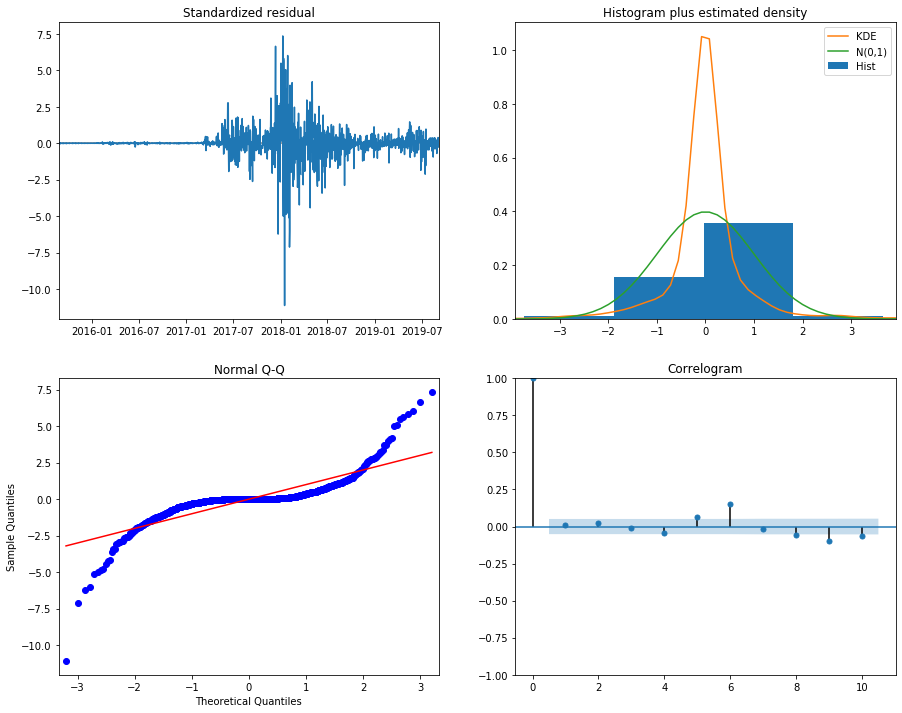

In [20]:
mod = sm.tsa.statespace.SARIMAX(df_arima,
                                order=Min_AIC_list['param'],
                                seasonal_order=Min_AIC_list['param_seasonal'],
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()

print("### Min_AIC_list ### \n{}".format(Min_AIC_list))

print(results.summary().tables[1])

results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [21]:
pred = results.get_prediction(start=pd.to_datetime('2018-06-01'), dynamic=False)
pred_ci = pred.conf_int()

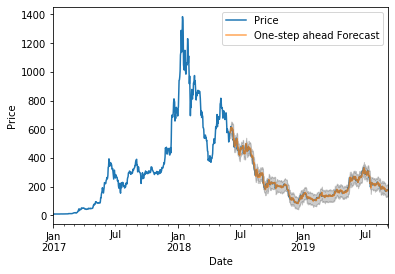

In [22]:
ax = df_arima['2017':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Price')
plt.legend()

plt.show()

In [23]:
df_arima_forecasted = pred.predicted_mean.to_frame()
df_arima_forecasted.columns=['Price']
df_arima_forecasted.index.names = ['Date']

df_arima_truth = df_arima['2018-06-01':]


# Compute the mean square error
mse = ((df_arima_forecasted - df_arima_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is Price    153.24
dtype: float64


In [24]:
# Get forecast 30 steps ahead in future
pred_uc = results.get_forecast(steps=30)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

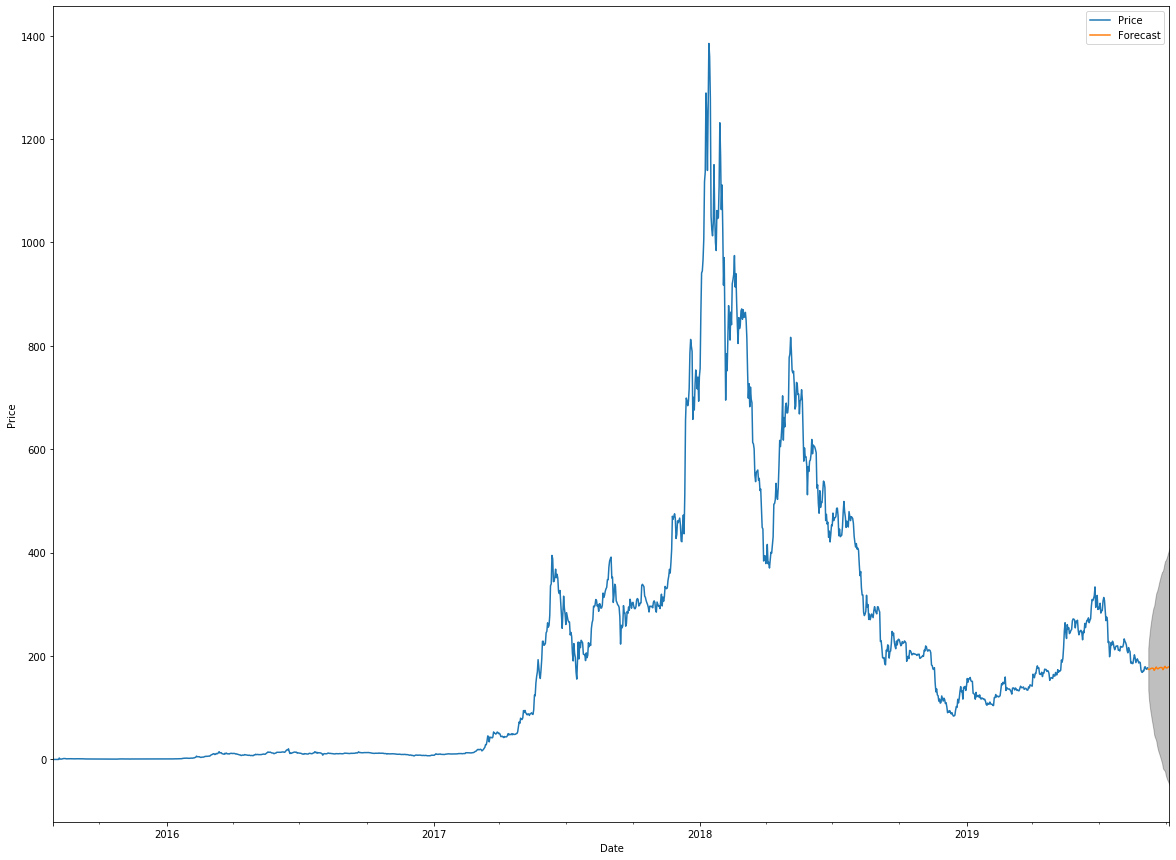

In [25]:
ax = df_arima.plot(label='observed', figsize=(20, 15))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Price')

plt.legend()
plt.show()

In [26]:
pred_uc.predicted_mean

2019-09-07    174.767092
2019-09-08    173.896450
2019-09-09    174.430959
2019-09-10    175.516315
2019-09-11    176.213387
2019-09-12    176.452410
2019-09-13    176.528725
2019-09-14    176.077119
2019-09-15    172.316320
2019-09-16    173.981578
2019-09-17    177.190568
2019-09-18    178.681561
2019-09-19    176.042485
2019-09-20    175.410700
2019-09-21    175.738622
2019-09-22    177.002654
2019-09-23    177.545190
2019-09-24    177.917871
2019-09-25    177.878585
2019-09-26    177.526962
2019-09-27    173.679688
2019-09-28    175.419738
2019-09-29    178.564041
2019-09-30    180.110982
2019-10-01    177.423517
2019-10-02    176.833583
2019-10-03    177.125308
2019-10-04    178.420647
2019-10-05    178.936105
2019-10-06    179.332206
Freq: D, dtype: float64

In [27]:
pred_uc.predicted_mean.to_frame()
pred_uc.predicted_mean.index.names = ['Date']
pred_uc.predicted_mean

Date
2019-09-07    174.767092
2019-09-08    173.896450
2019-09-09    174.430959
2019-09-10    175.516315
2019-09-11    176.213387
2019-09-12    176.452410
2019-09-13    176.528725
2019-09-14    176.077119
2019-09-15    172.316320
2019-09-16    173.981578
2019-09-17    177.190568
2019-09-18    178.681561
2019-09-19    176.042485
2019-09-20    175.410700
2019-09-21    175.738622
2019-09-22    177.002654
2019-09-23    177.545190
2019-09-24    177.917871
2019-09-25    177.878585
2019-09-26    177.526962
2019-09-27    173.679688
2019-09-28    175.419738
2019-09-29    178.564041
2019-09-30    180.110982
2019-10-01    177.423517
2019-10-02    176.833583
2019-10-03    177.125308
2019-10-04    178.420647
2019-10-05    178.936105
2019-10-06    179.332206
Freq: D, dtype: float64

In [28]:
import plotly.offline as py
import plotly.graph_objs as go
import plotly.figure_factory as ff
py.init_notebook_mode(connected=True)

# Chart the data
ether_prices = go.Scatter(x=pred_uc.predicted_mean.index, y=pred_uc.predicted_mean)
py.iplot([ether_prices])

=-=-=-=-=-=-=-=-=-==-----

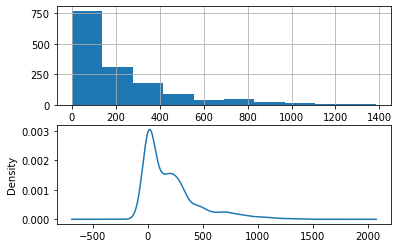

In [29]:
from matplotlib import pyplot
pyplot.figure(1)
pyplot.subplot(211)
df_arima.Price.hist()
pyplot.subplot(212)
df_arima.Price.plot(kind='kde')
pyplot.show()

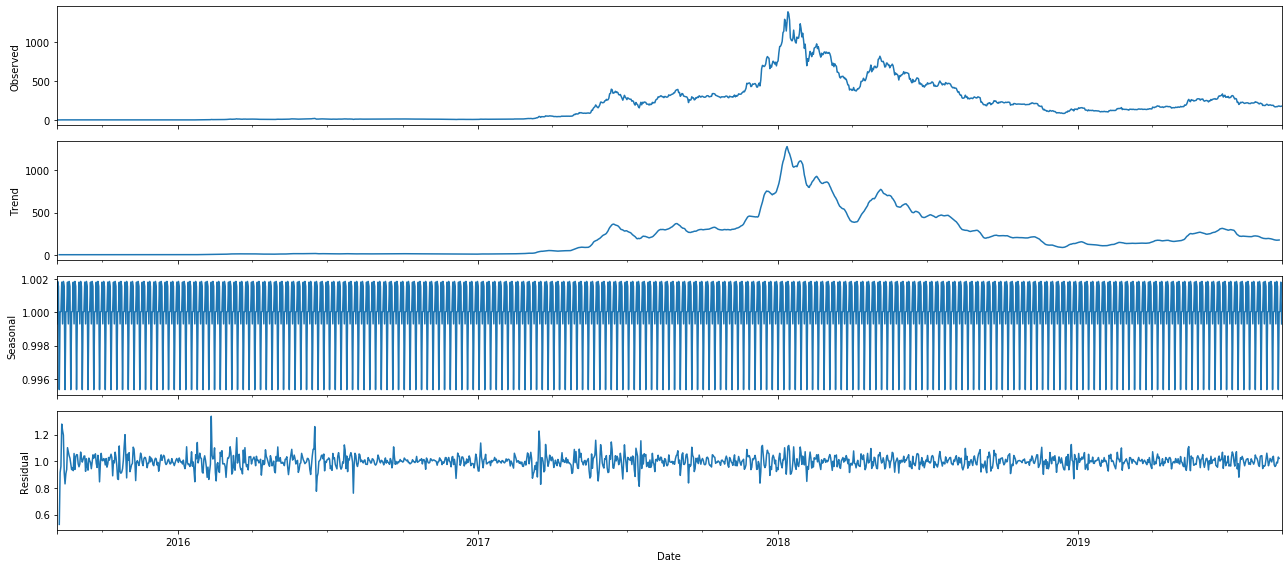

In [30]:
from pylab import rcParams
pd.plotting.register_matplotlib_converters()
# Long story short Prophet deregisters the Pandas converters in its code.


rcParams['figure.figsize'] = 18, 8

#(df_ads.Price == 0).sum() # = 8
df_arima = df_arima[df_arima['Price'] != 0]
# STL-decomposition
decomposition = sm.tsa.seasonal_decompose(df_arima, model='multiplicative')
fig = decomposition.plot()
plt.show()

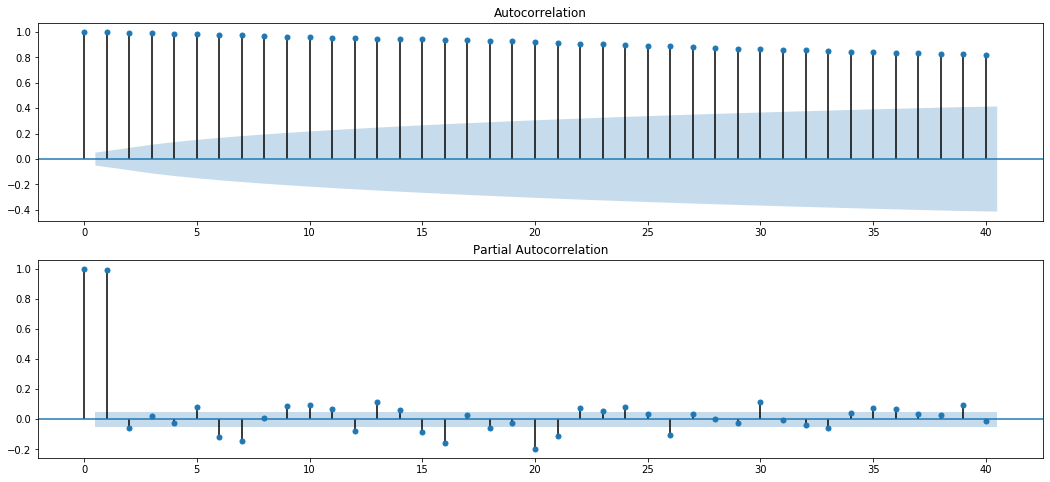

In [31]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

pyplot.figure()
pyplot.subplot(211)
plot_acf(df_arima.Price, ax=pyplot.gca(), lags = 40)
pyplot.subplot(212)
plot_pacf(df_arima.Price, ax=pyplot.gca(), lags = 40)
pyplot.show()

In [32]:

#Determing rolling statistics
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):

    #Determing rolling statistics
    rolmean =  pd.Series(timeseries).rolling(window=12).mean()
    rolstd =  pd.Series(timeseries).rolling(window=12).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

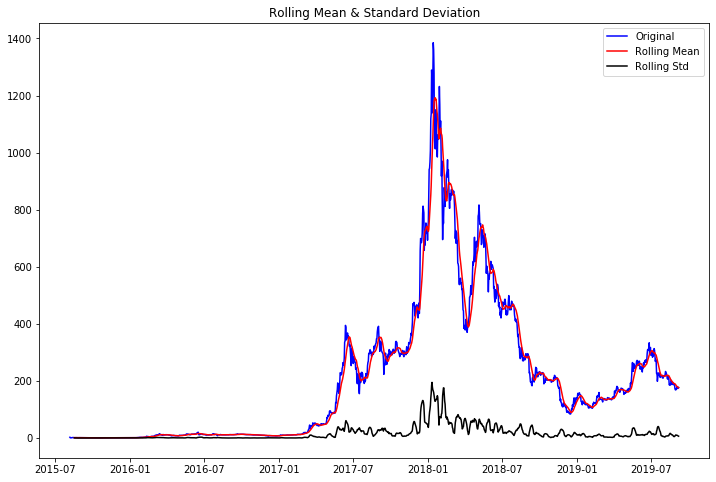

Results of Dickey-Fuller Test:
Test Statistic                   -2.073696
p-value                           0.255222
#Lags Used                       23.000000
Number of Observations Used    1468.000000
Critical Value (1%)              -3.434812
Critical Value (5%)              -2.863511
Critical Value (10%)             -2.567819
dtype: float64


In [33]:
test_stationarity(df_arima.Price)

In [34]:
# data is non-stationary.


=======================================================================================

======================================================================================